# Installation and Basic Usage of Gribberish

In this notebook, we demonstrate
1. How to install gribberish
2. How to read grib data using gribberish
3. Demonstate how to visualize data

## What is gribberish?

[Gribberrish](https://github.com/mpiannucci/gribberish) is a rust/python library for reading grib files. The core functtionality is written in rust, for those who are not familiar:

```
Rust is a general-purpose programming language. It is noted for its emphasis on performance, type safety, concurrency, and memory safety. Rust supports multiple programming paradigms.
```

Rust binds together with python relatively easily - and Matt, the author of this libary, has added xarray-backend support which makes it even easier to read into xarray datasets, how we will be using today.

We have extended the library a bit - adding support for some specific Spire-specific versions of grib, as well as adding ensemble and grib-1 reading support. Let's jump into it!

## Installation
You can install all the required libraries by going to the root of this directory and running


### Use a conda environment
```bash
mamba env create -f environment.yml
conda activate grib-reading-demo
```

### Install this separately, in your own environment
```bash
pip install gribberish
```


## Imports
You will notice here we do not need to import gribberish specifically - it will show up in our list of registered backends.

In [1]:
import xarray as xr

# List all available backends
xr.backends.list_engines()

{'netcdf4': <NetCDF4BackendEntrypoint>
   Open netCDF (.nc, .nc4 and .cdf) and most HDF5 files using netCDF4 in Xarray
   Learn more at https://docs.xarray.dev/en/stable/generated/xarray.backends.NetCDF4BackendEntrypoint.html,
 'h5netcdf': <H5netcdfBackendEntrypoint>
   Open netCDF (.nc, .nc4 and .cdf) and most HDF5 files using h5netcdf in Xarray
   Learn more at https://docs.xarray.dev/en/stable/generated/xarray.backends.H5netcdfBackendEntrypoint.html,
 'scipy': <ScipyBackendEntrypoint>
   Open netCDF files (.nc, .nc4, .cdf and .gz) using scipy in Xarray
   Learn more at https://docs.xarray.dev/en/stable/generated/xarray.backends.ScipyBackendEntrypoint.html,
 'cfgrib': <CfGribBackend>
   Open GRIB files (.grib, .grib2, .grb and .grb2) in Xarray
   Learn more at https://github.com/ecmwf/cfgrib,
 'grib2io': <GribBackendEntrypoint>,
 'gribberish': <GribberishBackend>,
 'kerchunk': <KerchunkBackend>
   Open Kerchunk References with Xarray
   Learn more at https://fsspec.github.io/kerchunk

## Reading Data with Gribberish


### Grib2 Data

Sample data is available in the `sample-data` directory.

Let's start with a GFS (Global Forecast System) file, and the key parameter required here is:

xr.open_dataset(your_file, ***engine="gribberish"***)

In [2]:
ds = xr.open_dataset("sample-data/gfs.t18z.pgrb2.0p25.f186-RH.grib2",
                     engine="gribberish")
ds

/Users/maxwellgrover/git_repos/gribberish/python/gribberish/gribberish_backend.py:50: UserWarning: Converting non-nanosecond precision datetime values to nanosecond precision. This behavior can eventually be relaxed in xarray, as it is an artifact from pandas which is now beginning to support non-nanosecond precision values. This warning is caused by passing non-nanosecond np.datetime64 or np.timedelta64 values to the DataArray or Variable constructor; it can be silenced by converting the values to nanosecond precision ahead of time.
  return xr.Dataset(


<xarray.Dataset> Size: 8MB
Dimensions:    (time: 1, latitude: 721, longitude: 1440)
Coordinates:
  * time       (time) datetime64[ns] 8B 2023-01-12T12:00:00
  * latitude   (latitude) float64 6kB 90.0 89.75 89.5 ... -89.5 -89.75 -90.0
  * longitude  (longitude) float64 12kB 0.0 0.25 0.5 0.75 ... 359.2 359.5 359.8
Data variables:
    rh         (time, latitude, longitude) float64 8MB ...
Attributes:
    meta:     Generated with gribberishpy

### Multi-level Grib Data
Let's try a more challenging case - multilevel grib data with pressure levels, surface data, etc.

In [3]:
ds = xr.open_dataset("sample-data/geavg.t12z.pgrb2a.0p50.f000",
                     engine="gribberish")
ds

/Users/maxwellgrover/git_repos/gribberish/python/gribberish/gribberish_backend.py:50: UserWarning: Converting non-nanosecond precision datetime values to nanosecond precision. This behavior can eventually be relaxed in xarray, as it is an artifact from pandas which is now beginning to support non-nanosecond precision values. This warning is caused by passing non-nanosecond np.datetime64 or np.timedelta64 values to the DataArray or Variable constructor; it can be silenced by converting the values to nanosecond precision ahead of time.
  return xr.Dataset(


<xarray.Dataset> Size: 146MB
Dimensions:          (time: 1, latitude: 361, longitude: 720, isobar_0: 10,
                      isobar_1: 11, isobar_2: 12)
Coordinates:
  * time             (time) datetime64[ns] 8B 2025-10-30T12:00:00
  * isobar_0         (isobar_0) float64 80B 1e+03 5e+03 1e+04 ... 9.25e+04 1e+05
  * isobar_1         (isobar_1) float64 88B 1e+03 5e+03 1e+04 ... 9.25e+04 1e+05
  * isobar_2         (isobar_2) float64 96B 1e+03 5e+03 1e+04 ... 9.25e+04 1e+05
  * latitude         (latitude) float64 3kB 90.0 89.5 89.0 ... -89.0 -89.5 -90.0
  * longitude        (longitude) float64 6kB 0.0 0.5 1.0 ... 358.5 359.0 359.5
Data variables: (12/20)
    hgt_sfc_ens      (time, latitude, longitude) float64 2MB ...
    prmsl            (time, latitude, longitude) float64 2MB ...
    vvel             (time, latitude, longitude) float64 2MB ...
    rh_isobar_ens    (time, isobar_0, latitude, longitude) float64 21MB ...
    icetk            (time, latitude, longitude) float64 2MB ...
    ugrd_hag_ens     (time, latitude, longitude) float64 2MB ...
    ...               ...
    tmp_hag_ens      (time, latitude, longitude) float64 2MB ...
    weasd            (time, latitude, longitude) float64 2MB ...
    vgrd_isobar_ens  (time, isobar_2, latitude, longitude) float64 25MB ...
    tsoil            (time, latitude, longitude) float64 2MB ...
    tmp_isobar_ens   (time, isobar_0, latitude, longitude) float64 21MB ...
    ugrd_isobar_ens  (time, isobar_2, latitude, longitude) float64 25MB ...
Attributes:
    meta:     Generated with gribberishpy

### Visualize Data
We can use xarray directly here to visualize the datasets.

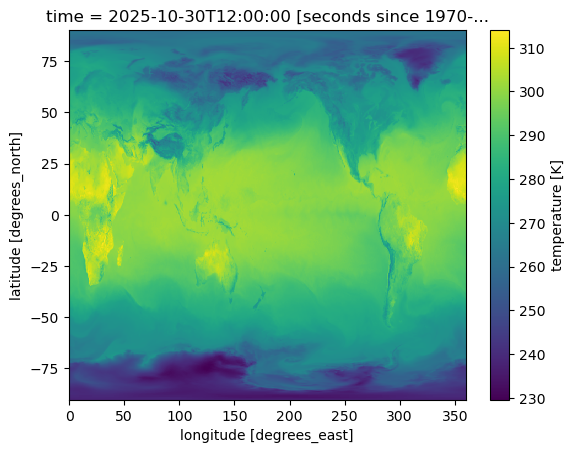

In [5]:
ds.tmp_hag_ens.plot()

### Select a single point
We can also use xarray to select a single point

In [6]:
ds.tmp_hag_ens.sel(latitude=40.0190,
                   longitude=(360-105.2747),
                   method="nearest").values

array([272.38])

## Conclusions
These changes will be made available within the upstream `gribberish` at some point in the near future - these enhancements are very much still in beta/testing mode.